<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Привет! Спасибо, что прислал задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделал большую работу над проектом, однако его еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты,  будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>

Правильно, что есть краткое вступление в работу, описание того, что надо делать. В работе следует приводить краткий план того, что надо сделать(если этот план имеется), а также информацию о входных данных: какие столбцы есть в таблице, их названия и какую информацию они несут. Также название работы лучше отображать в отдельной ячейке и делать крупный шрифт (заголовок). Так работа выглядит презентабельно. Подробнее смотри [методичку](https://www.notion.so/35d9c2f32ffa42f3b17010737aedca4b) по оформлению проектов.

</div>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Я заметил, что ячейки в твоей тетрадке начинаются не с 1. Перед отправкой работы рекомендую перезапускать ноутбук, чтобы убедиться, что все ячейки выполняются корректно.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Перезапуск позволяет обнаружить и исправить скрытые в коде ошибки. 

</div>

In [1]:
import pandas as pd
import seaborn as sns
from pymystem3 import Mystem
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', delimiter='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
df.to_csv('download_me', index=False)

In [4]:
df.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Файл открыт, представляет собой разхличную информацию по квартирам из архива объявлений о продаже. Включает в себе различные параметры, вроде площади, планировки, наличия различных объектов поблизости. 

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

У меня имеется несколько комментариев по данному шагу:
- следует давать переменным осознанные имена. Таблица про квартиры - название надо бы выбрать соответствующее;
- Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки.

Первый взгляд на таблицу выполнен.

</div>

### Шаг 2. Предобработка данных

#### Поиск пропусков

In [5]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Очищаем данные от неифнормативных столбцов, дубликатов и некоторыз пропусков.

In [6]:
df = df.drop_duplicates()

In [7]:
df = df.dropna(subset=['locality_name'])

In [8]:
try:    
    df = df.drop(columns=[
        'parks_around3000',
        'parks_nearest',
        'ponds_around3000',
        'ponds_nearest',
        'balcony',
        'airports_nearest',
        'is_apartment'
    ])
except:
    print('Столбцы уже удалены')

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Данные параметры в анализе мы не используем, но их лучше оставить. По ним мы можем восстанавливать пропуски в других параметрах или использовать иным образом в дальнейшей работе. 

</div>

#### Приведение даты к date_time

In [9]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

#### Заполнение пропусков медианой 

In [10]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

In [11]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Заполнение такого числа пропусков в высоте потолков одним значением может исказить структуру данного столбца. Слишком много пропусков у нас в данном параметре. Подумай, на основании какого параметра лучше будет обработать данный столбец. Строительство, в основном, типовое, поэтому одинаковые дома обладают схожими характеристиками. Однако ввиду малой дисперсии в данном параметре, мы можем использовать такой способ обработки пропусков. 

</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>
    
Заполнять мы, строго говоря, имеем право только когда данные пропущены совершенно случайно (MCAR) - тогда заполнение не повлияет на характер связи между заполняемой переменной и остальными. Относятся ли пропуски в длительности продажи к данному типу пропусков? Посмотри внимательнее на распределение пропусков в данном столбце во времени, т.е. относительно дня выставления квартиры на продажу. 

</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:</b>
      Решил вообще отказаться от заполнения пропусков по дня на продажу, ведь это вполне могут быть до сих пор не проданные квартиры. Оставлю их как есть и дальше просто не буду учитывать.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Так и есть. Т.е. это неслучайный пропуск. Оставить пропуски в данных - верное решение. 

</div>

In [12]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(int(df['cityCenters_nearest'].median()))

#### Заполенение пропусков living_area

In [13]:
living_areas_medians = df.groupby('rooms')['living_area'].median()

In [14]:
def fill_area_with_median(row):
    
    if pd.isnull(row['living_area']):
        return living_areas_medians[row['rooms']]
    
    else:
        return row['living_area']

In [15]:
df['living_area'] = df.apply(fill_area_with_median, axis=1)

#### Заполнение пропусков kitchen_area

In [16]:
kitchen_area_medians = df.query('rooms > 0').groupby('rooms')['kitchen_area'].median()

In [17]:
def fill_kitchen_with_median(row):
    
    rooms = row['rooms']
    
    if rooms == 0:
        return 0
    
    elif pd.isnull(rooms):
        return kitchen_area_medians[rooms]
    
    else:
        return rooms

In [18]:
df['kitchen_area'] = df.apply(fill_kitchen_with_median, axis=1)

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Пропуски в площадях обработаны точно. Конечно, данные параметры зависят от числа комнат. Стоило также привести коэффициенты корреляции в качестве доказательства выбора данного способа обработки пропусков. 

</div>

#### Приведение к int

In [19]:
df['floors_total'] = df['floors_total'].astype('int')

### Вывод

Из датасета вырезал все столбцы, которые не требуется для ответы на вопросы из задания. Пропуски в основном заполнены медианами, некоторые взяты по столбцам, некоторые по группам. Количество этажей переведено в int, т.к. то дискретная величина и хвостов там быть не должно. Столбец с датой\временем продажи перевел в date\time. 

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Пропуски обработаны там, где это возможно. Данные подготовлены к дальнейшему анализу. Попробуй улучшить обработку пропусков в отмеченных выше параметрах.

</div>

### Шаг 3. Посчитайте и добавьте в таблицу

#### Рассчет цены квадратного метра

In [20]:
df['cost_per_meter'] = df['last_price']/df['total_area']

#### Рассчет соотношения жилой и общей площади

In [21]:
df['total_to_living'] = df['living_area']/df['total_area']

#### Рассчет соотношения кухни к жилой площади

In [22]:
df['kitchen_to_living'] = df['kitchen_area']/df['living_area']

#### Указываем первый\последний\другой этаж

In [23]:
def floor_categorize(row):
    
    if row['floor'] == 1:
        return "первый"
    
    elif row['floor'] == row['floors_total']:
        return "последний"
    
    else:
        return "другой"

In [24]:
df['floor_category'] = df.apply(floor_categorize, axis=1)

### Вывод 

В шаге практически нечего описывать, пара новых столбцов, один шаг с категоризацией этажа

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Добавление необходимых для дальнейшего исследования параметров произведено. 

</div>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [25]:
def examine_params(df,params):
    
    for param in params:
        
        q1 = df[param].quantile(0.25)
        q3 = df[param].quantile(0.75)
        iqr = q3 - q1
        
        filtered_param = df[(df[param] > (q1 - (3 * iqr))) & (df[param] < (q3 + (3 * iqr)))][param]
        
        print (filtered_param.describe())
        
        fig = plt.figure(figsize=(8,6))
        
        sns.distplot(
            filtered_param,
            axlabel =  f'Распределение параметра {param}'
        )
        plt.show()
        plt.gcf().clear()

count    2.268200e+04
mean     5.271381e+06
std      2.914297e+06
min      1.219000e+04
25%      3.390000e+06
50%      4.500000e+06
75%      6.400000e+06
max      1.699000e+07
Name: last_price, dtype: float64


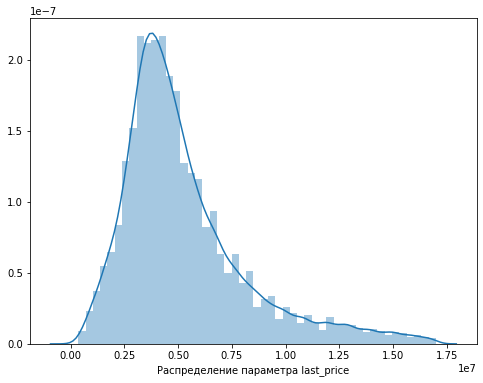

count    22105.000000
mean         2.652766
std          0.116631
min          2.340000
25%          2.600000
50%          2.650000
75%          2.650000
max          3.000000
Name: ceiling_height, dtype: float64


<Figure size 432x288 with 0 Axes>

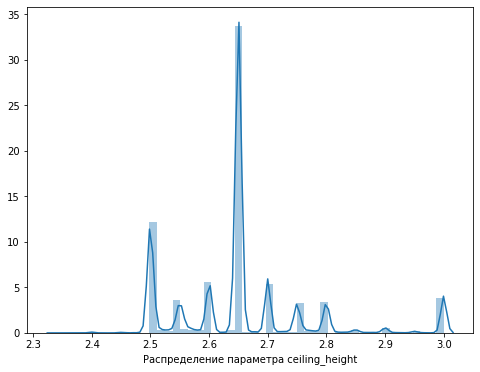

count    23631.000000
mean         2.062714
std          1.043876
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64


<Figure size 432x288 with 0 Axes>

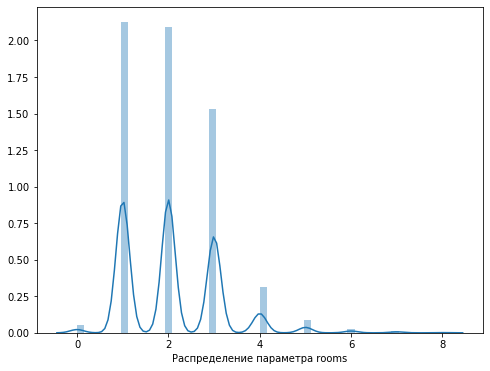

<Figure size 432x288 with 0 Axes>

In [27]:
examine_params(df,['last_price','ceiling_height','rooms'])

In [28]:
df = df.query(' 12 <= total_area <= 158')

In [29]:
df = df.query(' 1.219000e+04 <= last_price <= 1.699000e+07')

In [30]:
df = df.query(' 0 <= rooms <= 8')

In [31]:
df = df.query(' 2.34 <= ceiling_height <= 3')

###  Вывод


После изучения, площади, цены, числа комнат и высоты потолков можно сказать, что все эти величины имеют распределение, близкое к распределению Пуассона, большинство значений сконцентрированно около левой границы графика, а в правую сторону уходит длинный хвост. 

Для отсечения аномальных значений в хвостах были применены квантили. 
Неинформативные данные удалены из датасета. Редкие и выбиывающиеся значения удалены.


<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

При анализе ты проводишь однотипные действия на каждом шаге. Попробуй автоматизировать процесс построения графиков через цикл или собственную функцию. Интервал построения графиков рассчитывай автоматически. Например, от Q1-3\*IQR до Q3+3\*IQR. Число корзин выбери оптимальным для всех графиков.
    
По каждому графику работы проверь подписи осей, а также названия рисунков. Без этого порой не совсем ясно, что именно ты анализируешь. 

</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Выбросы из данных удалены. Можно также построить график boxplot для визуализации структуры необходимых столбцов. 

</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:</b>
    Написал функцию examine_params(), которая получает на входа датафрейм и массив столбцов, для каждого из них она отсекает значения по предложенной формуле Q1-3*IQR до Q3+3*IQR, и строит график, добавил x-оси название для графика.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Молодец, процесс построения графиков теперь автоматизирован. Здорово, что ты используешь seaborn в своем проекте. 

</div>

#### Исследуем время продажи квартиры

In [32]:
df['days_exposition'].describe()

count    18788.000000
mean       173.174526
std        212.256269
min          1.000000
25%         44.000000
50%         91.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [33]:
df['days_exposition'].quantile(0.95)

618.0

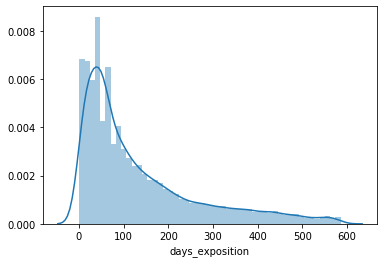

In [34]:
sns.distplot(df.query('days_exposition < 587.0')['days_exposition'])

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Обрати внимание на пик из-за заполнения пропусков. Попробуй улучшить обработку пропусков в данном параметре. 

</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:</b>
      После изменения подхода к обработке пропусков - странный пик исчез
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>
    
Да, ведь он появлялся после обработки пропусков. 

</div>

In [35]:
df = df.query('days_exposition < 587.0')

### Вывод

В среднем квартира продается за 180 дней, однако, это оценка является смещенной из-за очень большого хвоста. Из-за смещенности среднего будем ореинтироваться на медиану, которая составляет 95 дней, значит, квартира обычно родается за этот срок.

25% значений не превышают 45 дней, если квартира продана менее, чем за этот срок, можно считать, что ее продали быстрее, чем обычно.

75% значений не превышает 232 дней, однако это значение так же может искажено хвостом, поэтому будем считать, что пороговое значение для продажи дольше, чем обычно, будет составлять 95 + (95-45) = 145 дней 



<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
   
Здорово, что есть гипотезы о быстрых и долгих сделках.

</div>

#### Находим топ-10 городов по стоимости квадратного метра

In [36]:
sub_df = df.pivot_table(
    index='locality_name', 
    values=['cost_per_meter'], 
    aggfunc = 'mean').sort_values('cost_per_meter', ascending = False).head(10)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

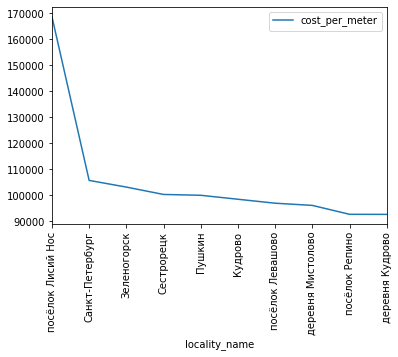

In [37]:
sub_df.plot()
plt.xticks(rotation=90) 

Выглядит хорошо, Лисий Нос - элитный поселок, с большими и дорогими домами, дальше за ним - крупный город. 

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Результат по ценам в зависимости от местоположения квартир получен, можно привести график зависимости цены от местоположения.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Лучше использовать диаграмму, т.к. мы работаем с категориальными данными. 

</div>

#### Находим корреляцию между параметрами

In [38]:
def show_scatter_for(df, main_param, sub_param):
    
    for param in sub_param:
        df.plot(x=param, y=main_param, kind='scatter')
        plt.show()
        plt.gcf().clear()

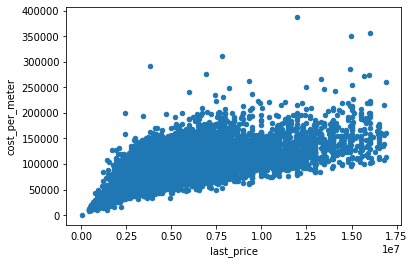

<Figure size 432x288 with 0 Axes>

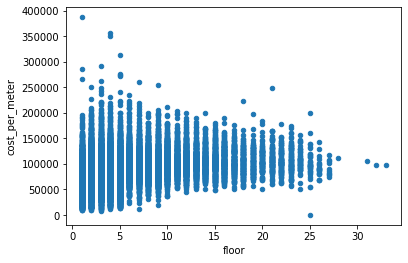

<Figure size 432x288 with 0 Axes>

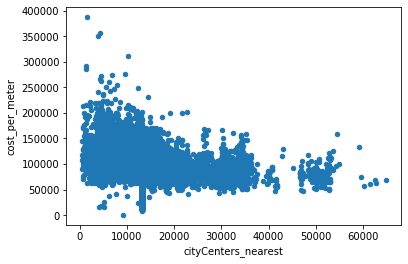

<Figure size 432x288 with 0 Axes>

In [39]:
show_scatter_for(df, 'cost_per_meter', ['last_price','floor','cityCenters_nearest'])

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Необходимые графики приведены. Старайся всегда визуализировать информацию. Так она воспринимается значительно лучше. 

</div>

In [40]:
corr_matrix = df.corr()

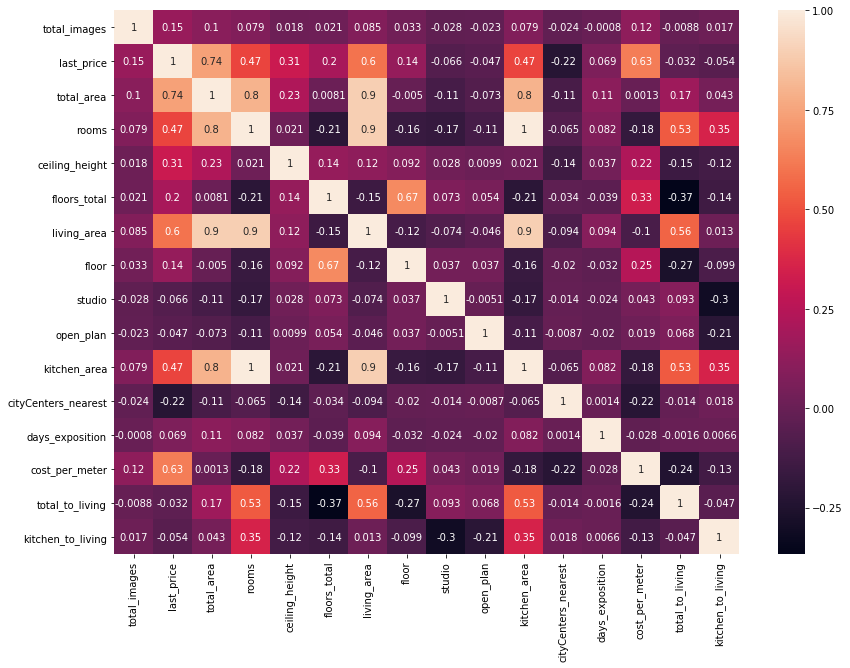

In [41]:
fig = plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Здорово, что ты умеешь визуализировать матрицу корреляций. Добавив параметр annot=True, мы можем отобразить коэффициенты корреляции на самом рисунке. 

</div>

### Вывод

Больше всего на общую стоимость влияет площадь кваритиры, остальные факторы, корреляция с остальными факторами совсем незначительная.

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Помимо корреляций надо также построить и графики зависимости цены от данных в задании параметров. Корреляция Пирсона показывает линейную взаимосвязь, а она может быть и нелинейной. 

</div>

#### Анализируем квартиры в центре питера

In [42]:
df_piter = df.query('locality_name == "Санкт-Петербург" ')

In [43]:
df_piter['cityCenters_nearest_km'] = df_piter['cityCenters_nearest']/1000

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

С предупреждениями также стоит разобраться. Иногда их бывает слишком много, поэтому важно уметь их скрывать. В этом тебе поможет библиотека warnings. Попробуй найти подходящий метод и убрать предупреждения.  

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Попробуй использовать команду pd.set_option('chained_assignment', None) для скрытия данного предупреждения.

</div>

In [44]:
df_piter = df_piter.dropna(subset=['cityCenters_nearest_km'])

In [45]:
df_piter['cityCenters_nearest_km'] = df_piter['cityCenters_nearest_km'].astype('int')

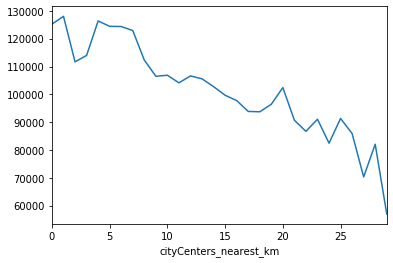

In [46]:
piter_grouped = df_piter.groupby('cityCenters_nearest_km').mean()
piter_grouped['cost_per_meter'].plot()

In [47]:
center_piter = df_piter.query('cityCenters_nearest_km < 4')

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Центр - довольно небольшая область. Попробуй уточнить границу. 20 км от центра - это почти весь Санкт-Петербург. 

</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:</b>
      Не знал точных размеров Питера, теперь понял, где ошибка, взял другой пик) 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Ага, теперь все правильно)

</div>

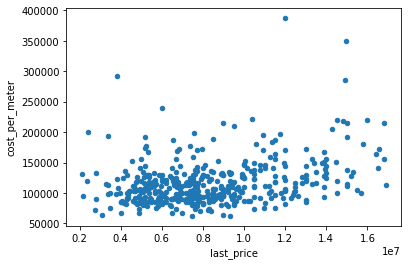

<Figure size 432x288 with 0 Axes>

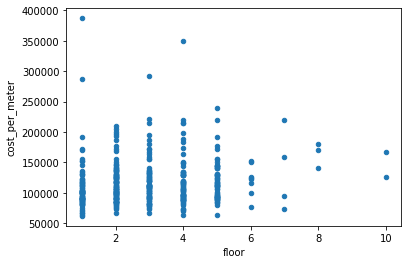

<Figure size 432x288 with 0 Axes>

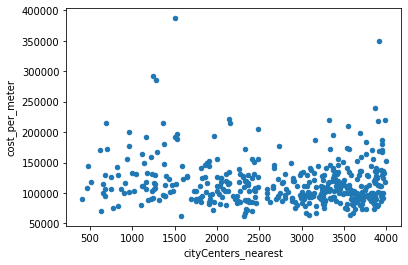

<Figure size 432x288 with 0 Axes>

In [48]:
show_scatter_for(center_piter, 'cost_per_meter', ['last_price','floor','cityCenters_nearest'])

In [49]:
corr = center_piter.corr()

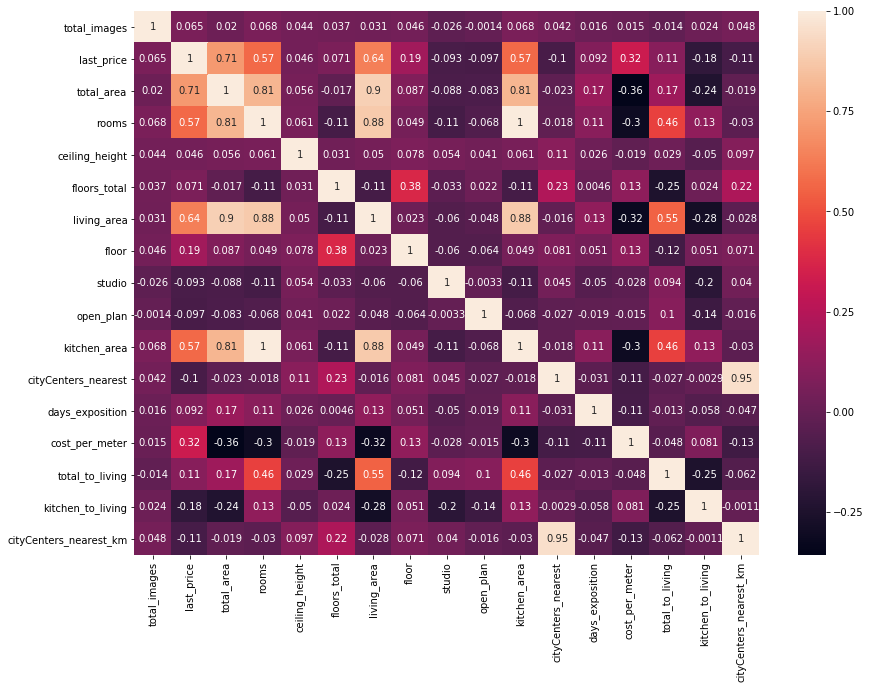

In [50]:
fig = plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True)

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Опять же, помимо корреляций, нам нужны графики зависимости цены от параметров. 
</div>  
<div class="alert alert-success">
Будет здорово, если ты построишь графики зависимости цены кв. метра от параметров квартиры для центра и для остальной части города на одном рисунке. Так различия в данных будет легче обнаружить. 

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера 2</h2>

Также необходимые гарфики приведены. Очень не хватает вывода по данному разделу работы. Не зря же ты его проводил. Попробуй выделить характерные черты центральной части города. 

</div>

### Шаг 5. Общий вывод

В результате работы над проектом были произведение следующие манипуляции:
1. Удалены параметры, не требующиеся для ответа на вопросы, поставленные в задании.
2. Для данных, для которых это возможно, были заполнены пропущенные значения.
3. Изменены типы данных для некоторых столбцов, для упрощения обработки в теле программы.
4. В данные были добавлены фичи, например, соотношение площадей и стоимость квадратного метра. 
5. Проведен исследовательский анализ данных, при помощи квартилей отсечены аномально высокие и редкие значения.
6. Построены матрицы корреляций и хитмапы для выявления связей между параметрами наблюдений. 

В результате работы с данными было выявлено, что в среднем квартиру продают 180 дней. А наиболее важными параметрами, вляющими на стоимость квартиры - являются различные площади, при этом жилая площадь ценится почти так же, как и общая площадь помещения.

В среднем, самые дорогие квартиры находятся в поселке Лисий Нос и Санкт-питербурге. 

Квартиры в центр обычно стоят дороже. Однако, прямой зависимости от близости к нулевому километру нет, скорее есть наценка после вхождения квартиры в определенную область.

Средняя стоимость квадратного метра по Питеру - 110.000 рублей.

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Финальный вывод и есть главный результат твоей работы. Стоит писать его подробно по результатам проведенной работы. В нем можно приводить полученные в ходе работы значения. Также можно расписать все, что было сделано в работе.

</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:</b>
      Переписал вывод, добавил пункты работы, что делал по ходу, докинул значений и промежуточных выводов.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод.     

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

- В начале работы стоит привести описание данных, с которыми работаем;
- Попробуй улучшить обработку пропусков;
- Автоматизируй процесс построения графиков;
- Проверь подписи осей на каждом графике работы;
- Приведи графики зависимости цены  от параметров квартиры как для всех данных, так и для центральной части города;
- Уточни границу центральной части города;
- Финальный вывод стоит делать по результатам проведенной работы.

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты выполнил все пункты работы, молодец! Теперь осталось исправить отмеченные тут замечания, и тогда получится очень достойная работа :)

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Помарки исправлены, и теперь работа выполнена хорошо. Ты проделал огромную работу над ошибками, молодец. Спасибо за оставленные комментарии по исправлениям. Успехов в дальнейших проектах :)

</div>
   

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод